In [26]:
from scipy.stats import binom
import matplotlib.pyplot as plt
import numpy as np

In [123]:
L = [1, 5,10, 11, 50, 100]

In [60]:
n=1
[binom.pmf(x, n, p) for x in range(int(n/2)+1,n+1)]

[0.7]

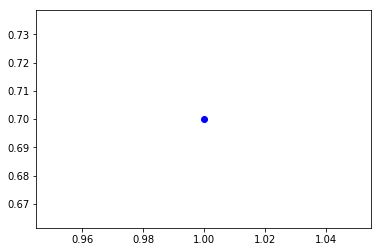

1
la probabilité de prédiciton correcte pour le modèle agrégé est 0.70000 pour 1 classifieur(s)


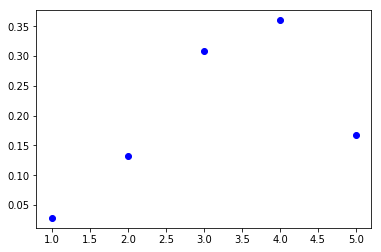

3
la probabilité de prédiciton correcte pour le modèle agrégé est 0.83692 pour 5 classifieur(s)


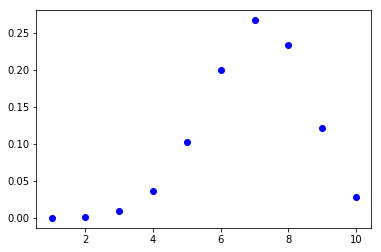

6
la probabilité de prédiciton correcte pour le modèle agrégé est 0.84973 pour 10 classifieur(s)


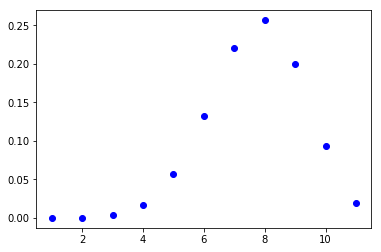

6
la probabilité de prédiciton correcte pour le modèle agrégé est 0.92178 pour 11 classifieur(s)


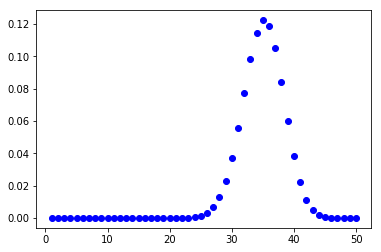

26
la probabilité de prédiciton correcte pour le modèle agrégé est 0.99763 pour 50 classifieur(s)


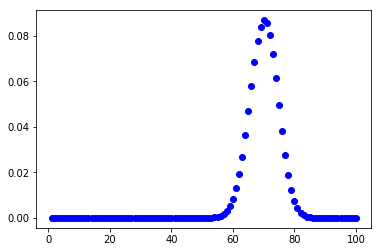

51
la probabilité de prédiciton correcte pour le modèle agrégé est 0.99998 pour 100 classifieur(s)


In [124]:
fig, ax = plt.subplots(1, 1)
p = 0.7
for n in L:
    x = np.arange(1,n+1)
    plt.plot(x, binom.pmf(x, n, p), 'bo', label='binom pmf')
    plt.show()
    m = int(n/2)+1
    print(m)
    print("la probabilité de prédiciton correcte pour le modèle agrégé est {:.5f} pour {} classifieur(s)".format(sum([binom.pmf(x, n, p) for x in range(m,n+1)]), n))

Q2

In [94]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 1 * (0.5 - rng.rand(16))
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]

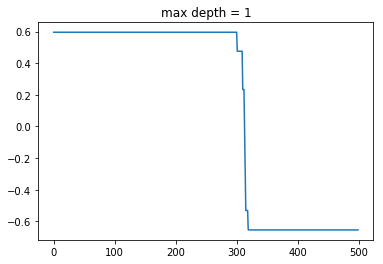

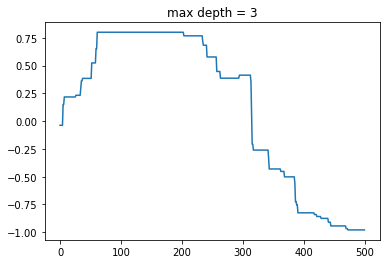

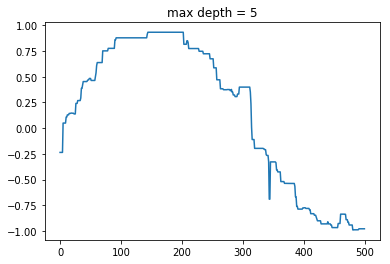

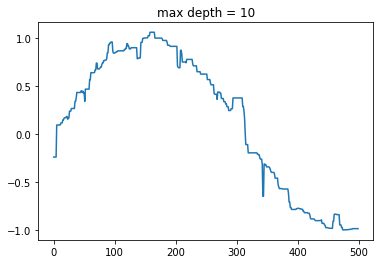

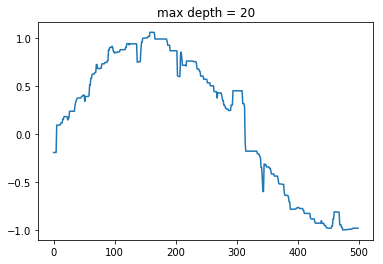

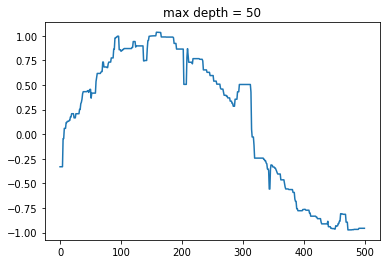

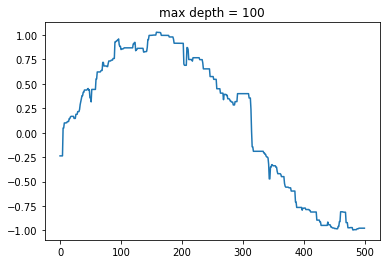

In [133]:
for m in [1,3,5,10,20,50,100]:
    br = BaggingRegressor(DecisionTreeRegressor(max_depth=m))
    br.fit(X,y)
    plt.title("max depth = {}".format(m))
    plt.plot(br.predict(X_test))
    plt.show()

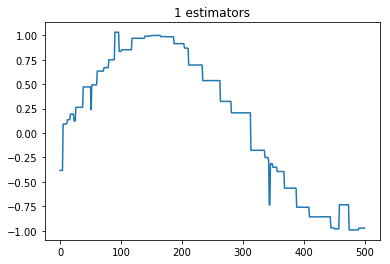

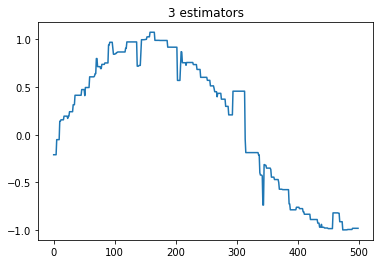

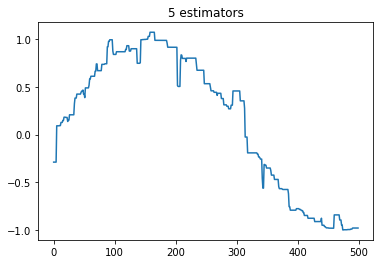

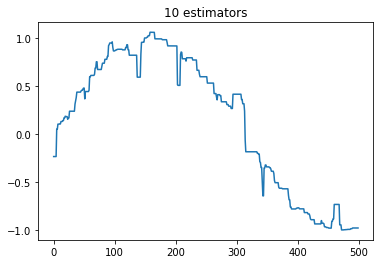

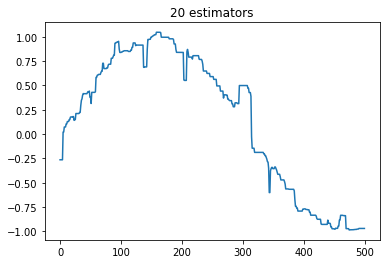

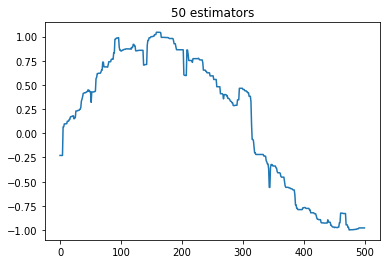

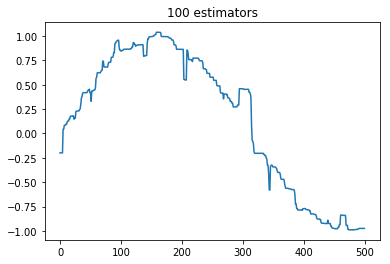

In [89]:
for n in [1,3,5,10,20,50,100]:
    br = BaggingRegressor(DecisionTreeRegressor(), n_estimators=n)
    br.fit(X,y)
    plt.title("{} estimators".format(n))
    plt.plot(br.predict(X_test))
    plt.show()

In [106]:
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y_noise = np.sin(X).ravel()
y_noise[::2] += 1.5 * (0.5 - rng.rand(40))
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]

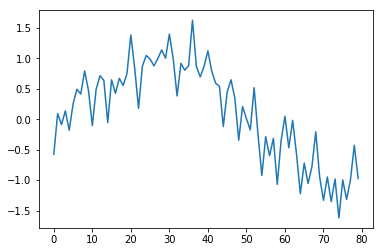

In [107]:
plt.plot(y_noise)

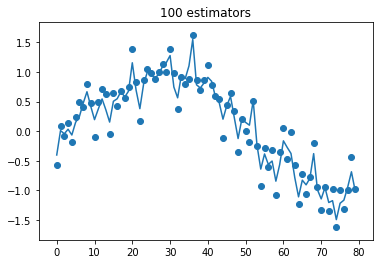

In [134]:
br = BaggingRegressor(DecisionTreeRegressor())
br.fit(X,y_noise)
plt.title("{} estimators".format(n))
plt.plot(br.predict(X))
plt.scatter(range(80),y_noise)
plt.show()

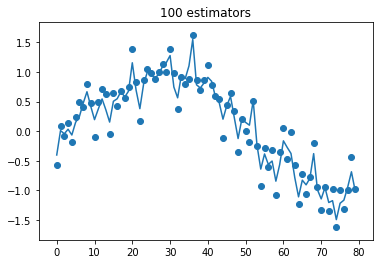

In [134]:
br = BaggingRegressor(DecisionTreeRegressor(), bootstrap=False, )
br.fit(X,y_noise)
plt.title("{} estimators".format(n))
plt.plot(br.predict(X))
plt.scatter(range(80),y_noise)
plt.show()